# Dask DataFrame

Материалы: 
* Макрушин С.В. Лекция 13: Dask DataFrame
* https://docs.dask.org/en/latest/dataframe.html
* JESSE C. DANIEL. Data Science with Python and Dask. 

## Задачи для совместного разбора

1. Считать данные из файлов в каталоге `accounts`. Содержат ли какие-либо из столбцов пропуски?

In [1]:
import operator
import os
import dask
import dask.dataframe as dd
import pandas as pd
import numpy as np

In [2]:
df = dd.read_csv('13_dask_dataframe_data/accounts/*.csv', dtype={'amount': 'float64'})

In [3]:
df.compute()

,id,names,amount
0,39,Victor,205.0
1,289,Hannah,87.0
2,234,Victor,1820.0
3,155,Ray,-600.0
4,266,Ray,572.0
...,...,...,...
999995,270,Edith,810.0
999996,249,Norbert,132.0
999997,308,Kevin,20.0
999998,302,Tim,33.0


In [4]:
df.compute().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   names   object 
 2   amount  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.6+ MB


2. Подсчитать количество раз, которое то или иное имя встретилось в выборке. Вывести самое часто встречающееся имя.

In [5]:
name_count = df['names'].value_counts().compute()
name_count

Norbert     188147
Alice       185892
George      183249
Tim         162432
Bob         157065
Michael     148372
Ingrid      132067
Oliver      121907
Quinn       118071
Wendy       110657
Charlie     109236
Ursula      108745
Hannah      108632
Ray         108610
Sarah       104781
Victor      102656
Frank        99984
Laura        97216
Jerry        96378
Xavier       94445
Edith        89991
Zelda        89047
Kevin        84784
Dan          73293
Patricia     62881
Yvonne       61462
Name: names, dtype: int64

3. Создать новую колонку, которая является результатом от деления значения `amount` нацело на 100, если `amount` > 100, и нулём в противном случае.

In [6]:
def new_column(x):
    if x > 100:
        return x // 100
    else:
        return 0

In [7]:
df['new_column'] = df['amount'].apply(new_column, meta=('amount', 'int64'))
df.compute()

,id,names,amount,new_column
0,39,Victor,205.0,2.0
1,289,Hannah,87.0,0.0
2,234,Victor,1820.0,18.0
3,155,Ray,-600.0,0.0
4,266,Ray,572.0,5.0
...,...,...,...,...
999995,270,Edith,810.0,8.0
999996,249,Norbert,132.0,1.0
999997,308,Kevin,20.0,0.0
999998,302,Tim,33.0,0.0


## Лабораторная работа 13

In [8]:
import dask.dataframe as dd
import pandas as pd
import dask.bag as db
import json
import dask

1. В архиве `recipes_full.zip` находятся файлы, содержащие информацию об рецептах блюд. Загрузите данные из файлов этого архива в виде `dd.DataFrame` с названием `recipes`. Укажите, что в столбце `submitted` содержатся даты.

In [23]:
recipes = dd.read_csv('13_dask_dataframe_data/recipes_full/*.csv', parse_dates=['submitted'], dtype={'minutes': 'float64', 'n_steps': 'float64'})
recipes.compute()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33.0,803776,2019-08-22,4.0,pat and gina neely and their family own and op...,9
1,1089012,kremsils mariposa baccala cookies class borage...,23.0,51579,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5
2,1428572,tania lander,0.0,68884,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5
3,1400250,heloise milli asher doogh zojirushi,24.0,678862,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1
4,387709,nutty chocolate chunk cookies,47.0,489552,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10
...,...,...,...,...,...,...,...,...
44011,1029131,tuti waffle snackies steakhouse,19.0,171345,1973-10-18,4.0,"according to a providence journal article, ama...",4
44012,1700703,noelias cheats crocante fleisch zitumbuwa,1.0,30228,2007-07-01,6.0,if possible sauté the onions and garlic in abo...,1
44013,1910650,rubbed restuffed pelmeni bedouin flavourful,60.0,591905,2009-09-26,3.0,another great recipe to add to the growing swe...,2
44014,713836,stems polpettine peezi,NaN,357389,2003-09-30,4.0,adapted from top secret recipes. love this!,9


In [1]:
print("Привезенцев Семен")

Привезенцев Семен


2. Выведите метаинформацию о таблице: `npartitions` и типы столбцов.

In [24]:
print("Количество npartitions: ", recipes.npartitions)
recipes.dtypes

Количество npartitions:  16


id                         int64
name                      object
minutes                  float64
contributor_id             int64
submitted         datetime64[ns]
n_steps                  float64
description               object
n_ingredients              int64
dtype: object

In [2]:
print("Привезенцев Семен")

Привезенцев Семен


3. Выведите на экран 5 первых строк таблицы. Выведите на экран 5 последних строк таблицы. В случае сообщения об ошибки объясните причину и исправьте ошибку.

In [25]:
recipes.head(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33.0,803776,2019-08-22,4.0,pat and gina neely and their family own and op...,9
1,1089012,kremsils mariposa baccala cookies class borage...,23.0,51579,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5
2,1428572,tania lander,0.0,68884,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5
3,1400250,heloise milli asher doogh zojirushi,24.0,678862,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1
4,387709,nutty chocolate chunk cookies,47.0,489552,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10


In [26]:
recipes.tail(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
44011,1029131,tuti waffle snackies steakhouse,19.0,171345,1973-10-18,4.0,"according to a providence journal article, ama...",4
44012,1700703,noelias cheats crocante fleisch zitumbuwa,1.0,30228,2007-07-01,6.0,if possible sauté the onions and garlic in abo...,1
44013,1910650,rubbed restuffed pelmeni bedouin flavourful,60.0,591905,2009-09-26,3.0,another great recipe to add to the growing swe...,2
44014,713836,stems polpettine peezi,NaN,357389,2003-09-30,4.0,adapted from top secret recipes. love this!,9
44015,660699,clementines,64.0,29196,1973-06-03,6.0,this would make a great start to your holiday ...,8


In [3]:
print("Привезенцев Семен")

Привезенцев Семен


4. Посчитайте, сколько строк содержит каждый из блоков

In [27]:
nrows = recipes.map_partitions(len).compute()
print(nrows)

0     237505
1      41450
2     235222
3      43733
4     238139
5      40816
6     234750
7      44205
8     237887
9      41068
10    234486
11     44468
12    238298
13     40656
14    234938
15     44016
dtype: int64


In [4]:
print("Привезенцев Семен")

Привезенцев Семен


5. Найдите максимум в столбце `n_steps`. Визуализируйте граф вычислений для этой задачи. Прокомментируйте логику работы `dask` в этом случае.

In [28]:
max_n_steps = recipes['n_steps'].max().compute()
print(max_n_steps)

145.0


In [5]:
print("Привезенцев Семен")

Привезенцев Семен


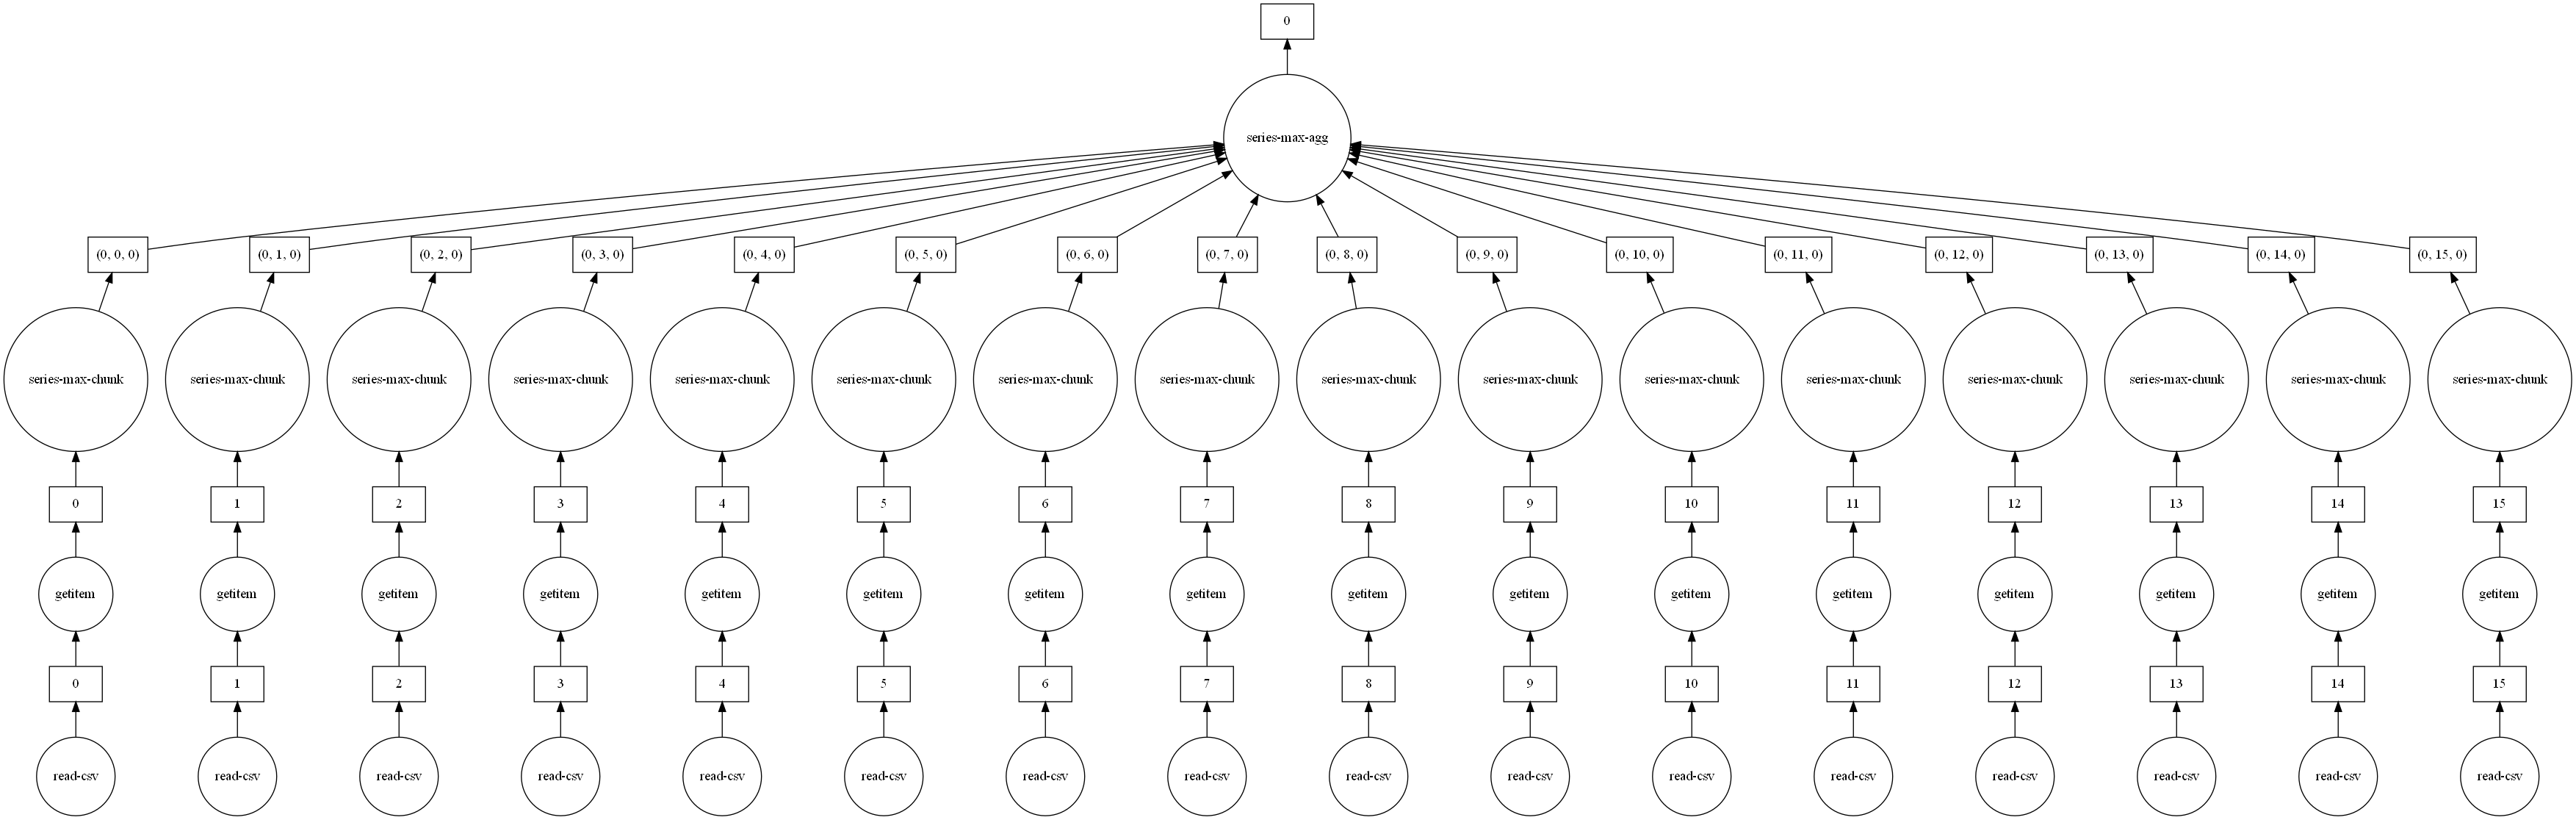

In [29]:
recipes['n_steps'].max().visualize()

In [6]:
print("Привезенцев Семен")

Привезенцев Семен


6. Посчитайте количество отзывов с группировкой по месяцам добавления отзыва в базу.

In [32]:
recipes['month'] = recipes['submitted'].dt.strftime('%m')
count_by_only_month = recipes.groupby('month')['id'].count().compute()

In [33]:
count_by_only_month

month
01    193363
02    173834
03    192389
04    186049
05    192487
06    184205
07    189337
08    187276
09    181081
10    187018
11    180974
12    183624
Name: id, dtype: int64

In [7]:
print("Привезенцев Семен")

Привезенцев Семен


7. Считайте файлы из архива `reviews_full.zip` (__ЛР12__) в виде `dask.bag`. Пользуясь результатом лабораторной работы 12, рассчитайте среднее значение оценок отзывов с группировкой по месяцам. После завершения всех вычислений преобразуйте результат к `pd.Series`.

In [51]:
def rating_append(x):
    x_return = json.loads(x[0])
    x_return["rating"] = int(x[1][-6])
    return x_return

In [52]:
dask_bag = db.read_text('12_map_reduce/reviews_full/*.json', include_path=True).map(rating_append)
dask_bag.take(2)

({'user_id': 452355,
  'recipe_id': 292657,
  'date': '2016-05-08',
  'review': 'WOW!!! This is the best. I have never been able to make homemade enchiladas that taste like the Mexican restaurants. I made this last night for my family and they said they will never have enchiladas at the Mexican Restaurants again. Thanks for sharing.',
  'rating': 0},
 {'user_id': 329304,
  'recipe_id': 433404,
  'date': '2006-06-14',
  'review': 'This was good but the dressing needed something and I found it to be a little too sweet, next time I will experiment with some garlic and herbs and reduce the sugar slightly, thanks for sharing kcdlong!...Kitten',
  'rating': 0})

In [8]:
print("Привезенцев Семен")

Привезенцев Семен


In [53]:
def average_by_month(dask_bag):
    mas_rating =[0]*12
    for i in range(1, 13):
        db_func = dask_bag.filter(lambda record: int(record['date'][5:7]) == i).pluck('rating').mean().compute()
        mas_rating[i - 1] = db_func
    return mas_rating

In [54]:
rating_by_month = average_by_month(dask_bag)
for num, rating in enumerate(rating_by_month):
    print("Месяц:", num + 1, "Рейтинг:", rating)

Месяц: 1 Рейтинг: 1.2805714028006403
Месяц: 2 Рейтинг: 1.2685545781438579
Месяц: 3 Рейтинг: 1.2648264182895852
Месяц: 4 Рейтинг: 1.2734396077465366
Месяц: 5 Рейтинг: 1.2773517732438724
Месяц: 6 Рейтинг: 1.2600783096242065
Месяц: 7 Рейтинг: 1.2677940213833734
Месяц: 8 Рейтинг: 1.2682479012459729
Месяц: 9 Рейтинг: 1.2782795911801825
Месяц: 10 Рейтинг: 1.2778239202657806
Месяц: 11 Рейтинг: 1.2673920928545521
Месяц: 12 Рейтинг: 1.2655113813713137


In [9]:
print("Привезенцев Семен")

Привезенцев Семен


8. Пользуясь результатами решения задач 6 и 7, создайте `pd.DataFrame`, содержащий два столбца: `mean_rating`, `recipes_count`

In [56]:
dataframe = pd.DataFrame({"mean_rating": rating_by_month, "recipes_count": list(count_by_only_month), })
dataframe.index += 1
dataframe

,mean_rating,recipes_count
1,1.280571,193363
2,1.268555,173834
3,1.264826,192389
4,1.273440,186049
5,1.277352,192487
6,1.260078,184205
7,1.267794,189337
8,1.268248,187276
9,1.278280,181081
10,1.277824,187018


In [10]:
print("Привезенцев Семен")

Привезенцев Семен
